In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
TRAINING_DIR='C:/Users/marsi/Downloads/Data/data/train'
TEST_DIR='C:/Users/marsi/Downloads/Data/data/test'
im_shape=(224,224)
BATCH_SIZE=32
seed=10


In [35]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [36]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [37]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Classes: ['benign', 'malignant']


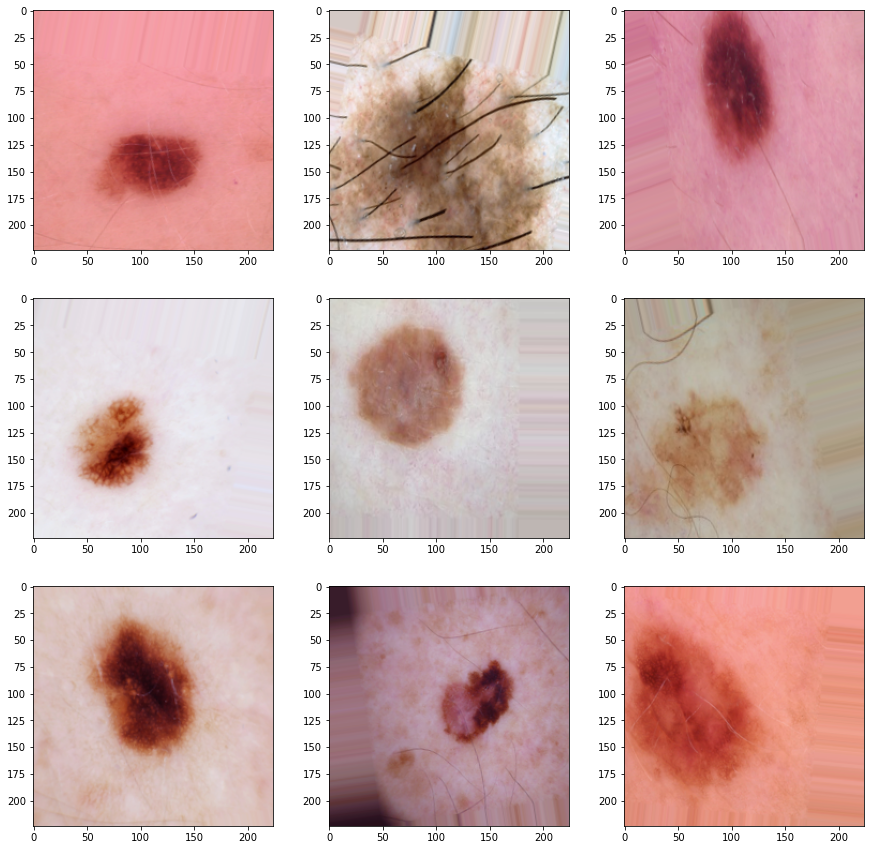

In [38]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [39]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 20)      560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 40)      7240      
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               47524100  
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [40]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='rapp.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
65/65 [==============================] - 99s 2s/step - loss: 1.6922 - accuracy: 0.6275 - val_loss: 0.7028 - val_accuracy: 0.6074

Epoch 00001: val_loss improved from inf to 0.70279, saving model to rapp.h5
Epoch 2/80
65/65 [==============================] - 101s 2s/step - loss: 0.6414 - accuracy: 0.7040 - val_loss: 0.6701 - val_accuracy: 0.6211

Epoch 00002: val_loss improved from 0.70279 to 0.67014, saving model to rapp.h5
Epoch 3/80
65/65 [==============================] - 115s 2s/step - loss: 0.6352 - accuracy: 0.6747 - val_loss: 0.6914 - val_accuracy: 0.5684

Epoch 00003: val_loss did not improve from 0.67014
Epoch 4/80
65/65 [==============================] - 108s 2s/step - loss: 0.6933 - accuracy: 0.6453 - val_loss: 0.5670 - val_accuracy: 0.5664

Epoch 00004: val_loss improved from 0.67014 to 0.56705, saving model to rapp.h5
Epoch 5/80
65/65 [==============================] - 117s 2s/step - loss: 0.6258 - accuracy: 0.6829 - val_loss: 0.6765 - val_accuracy: 0.5898

Epoc


Epoch 00041: val_loss did not improve from 0.45140
Epoch 42/80
65/65 [==============================] - 134s 2s/step - loss: 0.3634 - accuracy: 0.8157 - val_loss: 0.4669 - val_accuracy: 0.7695

Epoch 00042: val_loss did not improve from 0.45140
Epoch 43/80
65/65 [==============================] - 148s 2s/step - loss: 0.3713 - accuracy: 0.8171 - val_loss: 0.4629 - val_accuracy: 0.7891

Epoch 00043: val_loss did not improve from 0.45140
Epoch 44/80
65/65 [==============================] - 162s 2s/step - loss: 0.3649 - accuracy: 0.8306 - val_loss: 0.5074 - val_accuracy: 0.7734

Epoch 00044: val_loss did not improve from 0.45140
Epoch 45/80
65/65 [==============================] - 185s 3s/step - loss: 0.3634 - accuracy: 0.8316 - val_loss: 0.6397 - val_accuracy: 0.7285

Epoch 00045: val_loss did not improve from 0.45140
Epoch 46/80
65/65 [==============================] - 184s 3s/step - loss: 0.3843 - accuracy: 0.8114 - val_loss: 0.4755 - val_accuracy: 0.7988

Epoch 00046: val_loss did not

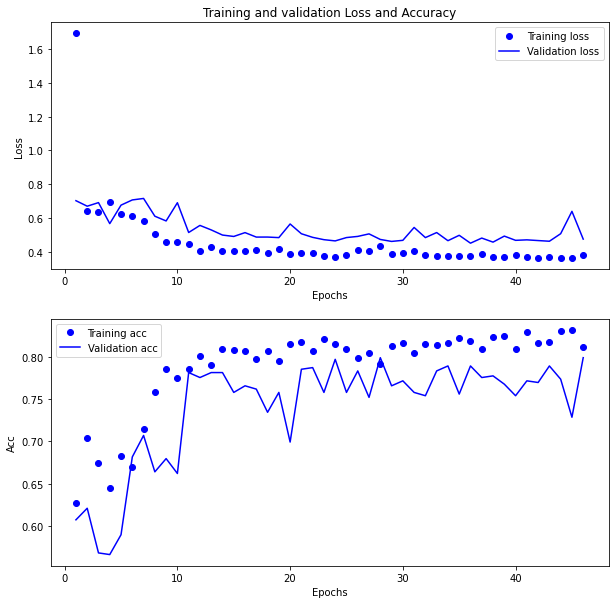

In [41]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('rapp.h5')

In [44]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

C:\Users\marsi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Val loss: 0.4797440767288208
Val accuracy: 0.7988615036010742


In [45]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3975147008895874
Test accuracy: 0.7969697117805481


In [46]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

      benign       0.93      0.68      0.79       360
   malignant       0.71      0.94      0.81       300

    accuracy                           0.80       660
   macro avg       0.82      0.81      0.80       660
weighted avg       0.83      0.80      0.80       660



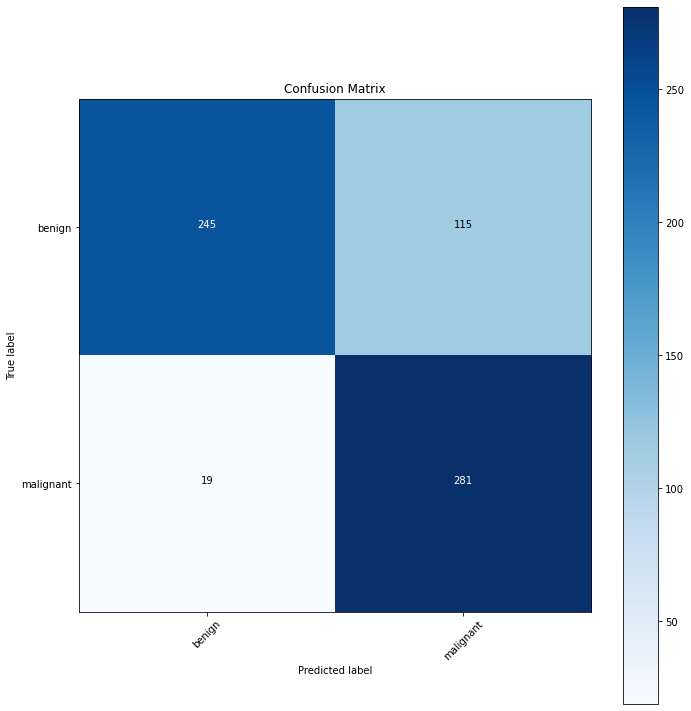

In [48]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))